# Chapter 03. 2차원 데이터 정리

In [1]:
import numpy as np
import pandas as pd

%precision 3
pd.set_option('display.precision', 3)

In [19]:
df = pd.read_csv('../data/ch2_scores_em.csv', index_col='student number')
df

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76
6,48,60
7,65,81
8,49,66
9,65,78


In [20]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english': en_scores, 'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name='student'))
scores_df.head

<bound method NDFrame.head of          english  mathematics
student                      
A             42           65
B             69           80
C             56           63
D             41           63
E             57           76
F             48           60
G             65           81
H             49           66
I             65           78
J             58           82>

## 3.1 두 데이터 사이의 관계를 나타내는 지표

#### 3.1.1 공분산 (covariance)

In [21]:
summary_df = scores_df.copy()
summary_df['english_deviation'] = \
    summary_df['english'] - summary_df['english'].mean()            # '편차' 열 생성
summary_df['mathematics_deviation'] = \
    summary_df['mathematics'] - summary_df['mathematics'].mean()    # '편차' 열 생성
summary_df['product of deviations'] = \
    summary_df['english_deviation'] * summary_df['mathematics_deviation']   # (영어'편차') * (수학'편차')
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [22]:
# 편차끼리의 곱들의 평균 => 공분산
summary_df['product of deviations'].mean()

62.800

In [23]:
summary_df['english'].var(ddof=0), summary_df['mathematics'].var(ddof=0)

(86.000, 68.440)

In [24]:
# '영어'와 '수학'의 공분산 구하기
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [25]:
# '영어', '수학'의 공분산
cov_mat[0, 1], cov_mat[1, 0]

(62.800, 62.800)

In [26]:
# cov_mat[0, 0] : '영어'의 분산
# cov_mat[1, 1] : '수학'의 분산
cov_mat[0, 0], cov_mat[1, 1]

(86.000, 68.440)

In [27]:
# '영어'의 분산, '수학'의 분산
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.000, 68.440)

#### 3.1.2 상관계수
- 공분산의 단위는 직감적으로 이해하기 어렵다.
- 예를 들어, 학생의 키와 시험 점수의 공분산은 (cm * 점수) 라는 단위가 된다.
- 이런 단위는 이해하기 어려우므로, "단위에 의존하지 않는 상관을 나타내는 지표"가 필요하다.
- 공분산은 각 데이터의 단위를 곱한 것이므로, 공분산을 각 데이터의 표준편차로 나누어 단위에 의존하지 않는 지표를 정의할 수 있다.

In [30]:
# '영어'와 '수학'의 상관계수 구하기
# '영어', '수학'의 공분산 / ('영어' 표준편차) * ('수학' 표준편차) 
np.cov(en_scores, ma_scores, ddof=0)[0, 1] /\
    (np.std(en_scores) * np.std(ma_scores))

0.819

In [31]:
# '영어'와 '수학'의 상관행렬(correlation matrix)
# numpy의 corrcoef 함수 : 상관행렬 반환
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [32]:
# pandas의 DataFrame의 corr 메서드 : 상관행렬 반환
scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


## 3.2 2차원 데이터의 시각화

In [33]:
import matplotlib.pyplot as plt

%matplotlib inline

#### 3.2.1 산점도

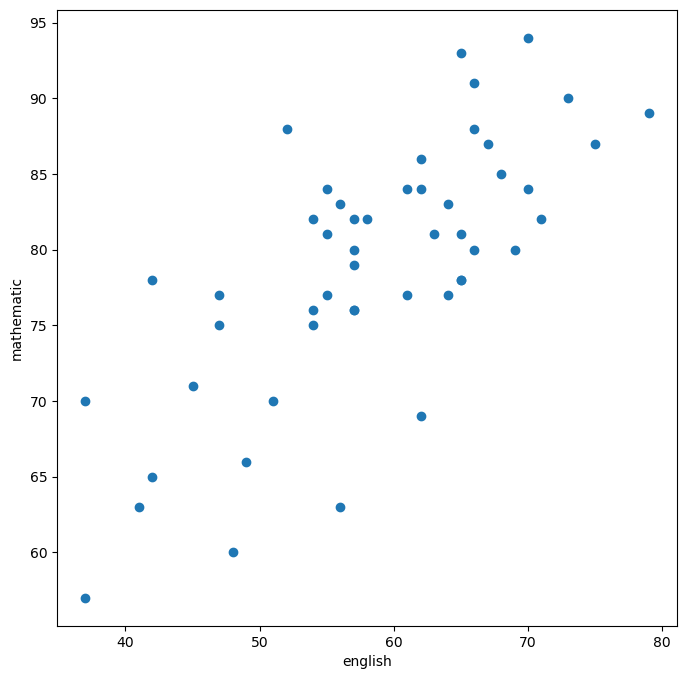

In [34]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# 산점도
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematic')

plt.show()

#### 3.2.2 회귀직선

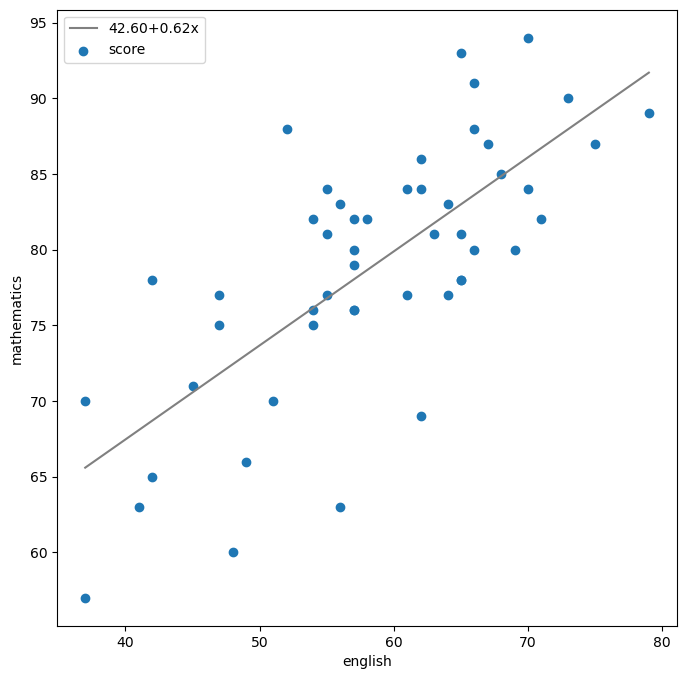

In [47]:
# matplotlib 에는 회귀직선을 직접 그리는 메서드가 없기 때문에 NumPy를 사용해서 회귀직선을 구한다.
# 계수 β_0과 β_1을 구한다.
poly_fit = np.polyfit(english_scores, math_scores, 1)
# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(english_scores.min(), english_scores.max())
# xs에 대응하는 y좌표를 구한다.
ys = poly_1d(xs)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(english_scores, math_scores, label='score')
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
# 범례 표시
ax.legend(loc='upper left')

plt.show()

#### 3.2.3 히트맵
- 히스토그램의 2차원 버전 (hist2d 메서드)

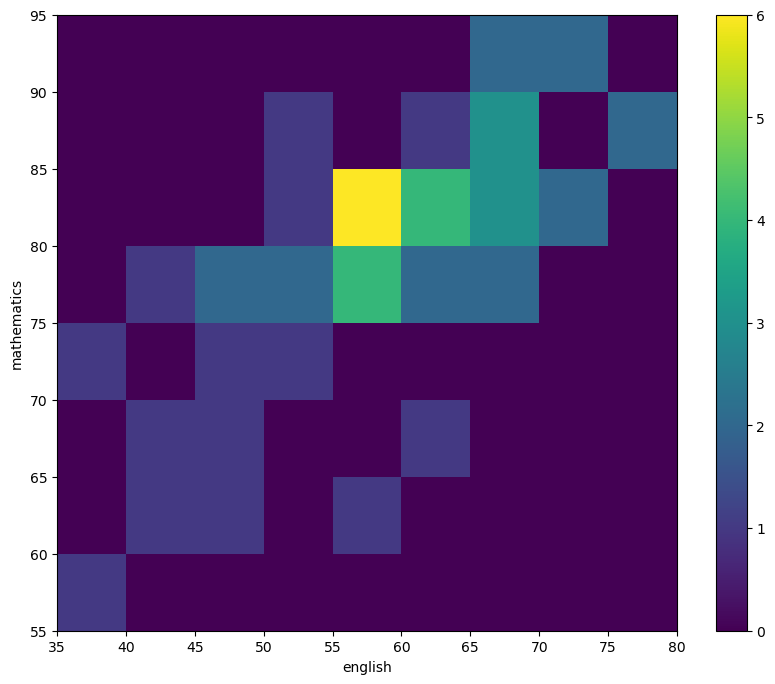

In [48]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores,
              bins=[9, 8], range=[(35, 80), (55, 95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
# 컬러 바 표시
fig.colorbar(c[3], ax=ax)
plt.show()

## 3.3 앤스컴의 예

In [51]:
# npy 형식으로 저장된 NumPy array를 읽어 들인다.
anscombe_data = np.load('../data/ch3_anscombe.npy')
print(anscombe_data.shape)  # 4 * 11 * 2
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [54]:
stats_df = pd.DataFrame(index=['X_mean', 'X_variance', 'Y_mean', 'Y_variance',
                               'X&Y_correlation', 'X&Y_regression line'])
for i, data in enumerate(anscombe_data):
    # data => (11, 2)
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}']=\
        [f'{np.mean(dataX):.2f}',
         f'{np.var(dataX):.2f}',
         f'{np.mean(dataY):.2f}',
         f'{np.var(dataY):.2f}',
         f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',
         f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


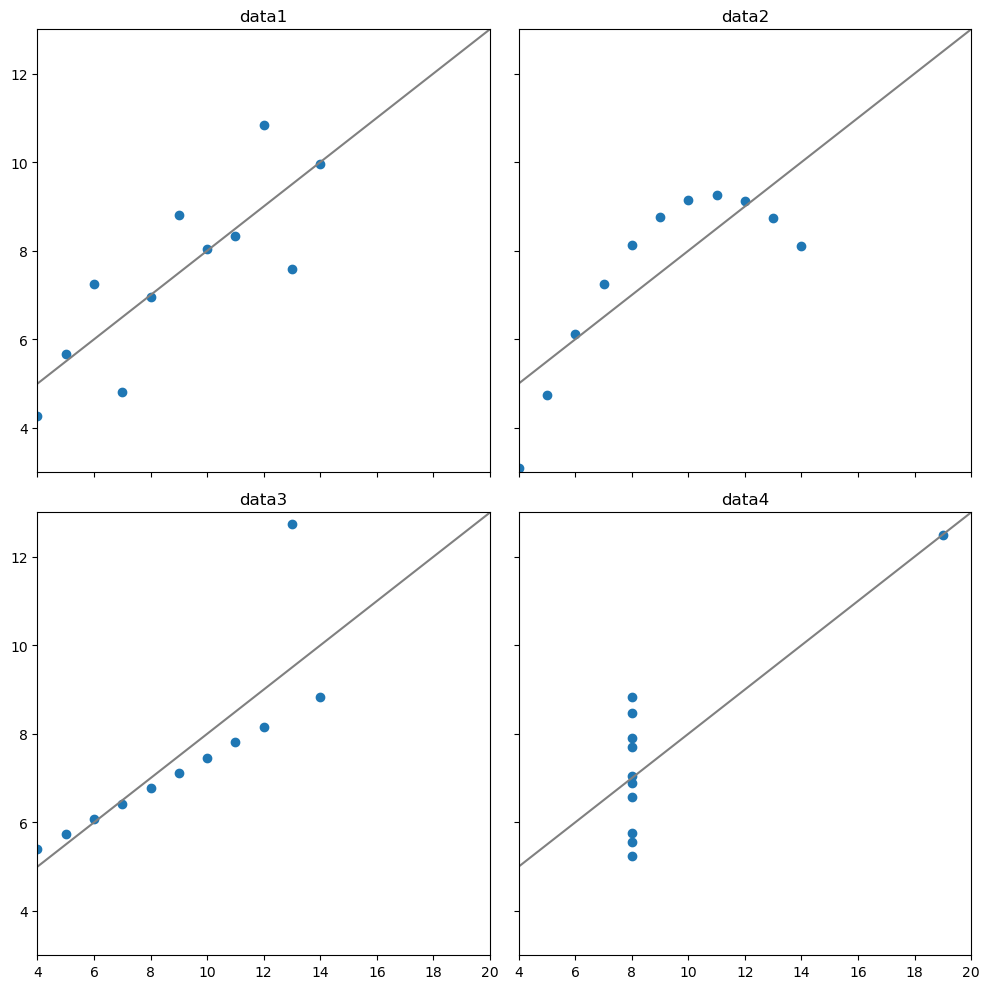

In [57]:
# 그래프를 그리기 위한 영역을 2x2개 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex=True, sharey=True)
xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:, 0], data[:, 1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # 그리는 영역을 선택
    ax = axes[i//2 , i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    # 타이틀을 부여
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:, 0], data[:, 1])
    ax.plot(xs, ys, color='gray')

# 그래프 사이의 간격을 좁힌다.
plt.tight_layout()
plt.show()